In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('app_data.csv')
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         428 non-null    float64
 1   BMI                         430 non-null    float64
 2   Sex                         430 non-null    object 
 3   Height                      430 non-null    float64
 4   Weight                      430 non-null    float64
 5   AlvaradoScore               430 non-null    int64  
 6   PediatricAppendicitisScore  430 non-null    int64  
 7   AppendixOnSono              428 non-null    object 
 8   AppendixDiameter            266 non-null    float64
 9   MigratoryPain               430 non-null    object 
 10  LowerAbdominalPainRight     429 non-null    object 
 11  ReboundTenderness           427 non-null    object 
 12  CoughingPain                429 non-null    object 
 13  PsoasSign                   393 non

In [4]:
#column dropping considering y3= AppendicitisComplications
df.drop(['AppendicitisComplications','TreatmentGroupBinar'],axis=1,inplace=True)

# peritonitis/Abdominal guarding
df.drop(['Peritonitis'],axis=1,inplace=True)

In [5]:
#df.info()

In [6]:
df_numerical = df.filter(['Age','BMI','Height','Weight','AlvaradoScore','PediatricAppendicitisScore',
                    'AppendixDiameter','BodyTemp','WBCCount','NeutrophilPerc','CRPEntry'],axis=1).copy()

In [7]:
#df_numerical.info()

In [8]:
df_categorical = df.filter(['Sex','KetonesInUrine','ErythrocytesInUrine','WBCInUrine',
                           'Peritonitis','AppendixWallLayers','TissuePerfusion'],axis=1).copy()

In [9]:
#df_categorical.info()

In [10]:
#df_categorical.head()

In [11]:
df_boolean = df.filter(['AppendixOnSono','MigratoryPain','LowerAbdominalPainRight','ReboundTenderness','CoughingPain',
                    'Nausea','AppetiteLoss','Dysuria','FreeFluids','Kokarde',
                    'SurroundingTissueReaction','PathLymphNodes','MesentricLymphadenitis','BowelWallThick','Ileus',
                    'FecalImpaction','Meteorism','Enteritis','DiagnosisByCriteria',
                     'PsoasSign','Stool'],axis=1).copy()

In [12]:
#df_boolean.info()

In [13]:
#df_boolean.sample(10)

In [14]:
#pandas profiling
#from pandas_profiling import ProfileReport

In [15]:
#profile = ProfileReport(df)
#profile.to_file(output_file = "AppendicitisComplications_profiling.html")

In [16]:
#perform label Encoding for categorical data

from sklearn.preprocessing import LabelEncoder
from pandas import Series
df_categorical = df_categorical.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [17]:
#df_categorical.info()

In [18]:
df_categorical.head()

,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,AppendixWallLayers,TissuePerfusion
0,1,0.0,0.0,3.0,0.0,0.0
1,0,NaN,NaN,NaN,NaN,NaN
2,1,3.0,3.0,3.0,0.0,NaN
3,1,3.0,3.0,3.0,NaN,NaN
4,0,3.0,3.0,3.0,NaN,NaN


In [19]:
#concatanation two dataframe
df_new = pd.concat([df_numerical,df_categorical],axis=1)

In [20]:
#df_new.info()

In [21]:
# MICE imputation
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [22]:
# Define MICE Imputer and fill missing values

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_new), columns=df_new.columns)

In [23]:
df_mice_imputed.head()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixDiameter,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,AppendixWallLayers,TissuePerfusion
0,12.531143,16.494601,159.0,41.7,7.0,5.0,5.500000,38.7,13.3,66.0,76.0,1.0,0.000000,0.000000,3.000000,0.000000,0.000000
1,12.410678,12.595222,152.0,29.1,8.0,8.0,8.353261,38.8,14.9,93.2,10.0,0.0,2.320421,2.520303,2.954601,0.545276,0.990460
2,10.537988,15.991247,133.5,28.5,3.0,3.0,6.000000,37.2,6.6,55.3,13.0,1.0,3.000000,3.000000,3.000000,0.000000,0.996017
3,10.425736,16.185025,146.0,34.5,4.0,3.0,6.000000,37.0,12.4,57.9,6.0,1.0,3.000000,3.000000,3.000000,0.785886,1.007573
4,13.270363,20.449137,164.0,55.0,2.0,2.0,6.500000,37.2,4.2,50.6,2.0,0.0,3.000000,3.000000,3.000000,0.867427,1.030191


In [24]:
#df_knn_imputed.info()

In [25]:
#df_knn_imputed.isnull()

In [26]:
#perform labelEncoding for Boolean data
df_boolean = df_boolean.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [27]:
#df_boolean.head()

In [28]:
df_boolean = df_boolean.fillna(df_boolean.mode().iloc[0])

In [29]:
#df_boolean.sample(20)

In [30]:
#df_boolean.info()

In [31]:
#concatanation two dataframe
df_final = pd.concat([df_mice_imputed,df_boolean],axis=1)

In [32]:
#df_final.info()

In [33]:
#correlation and pvalue

from scipy import stats
corr_df=pd.DataFrame(columns=['r','p'])

for col in df_final:
    print(col)
    if pd.api.types.is_numeric_dtype(df_final[col]):
        r,p = stats.pearsonr(df_final.DiagnosisByCriteria,df_final[col])
        corr_df.loc[col]=[round(r,3),round(p,3)]

corr_df

Age
BMI
Height
Weight
AlvaradoScore
PediatricAppendicitisScore
AppendixDiameter
BodyTemp
WBCCount
NeutrophilPerc
CRPEntry
Sex
KetonesInUrine
ErythrocytesInUrine
WBCInUrine
AppendixWallLayers
TissuePerfusion
AppendixOnSono
MigratoryPain
LowerAbdominalPainRight
ReboundTenderness
CoughingPain
Nausea
AppetiteLoss
Dysuria
FreeFluids
Kokarde
SurroundingTissueReaction
PathLymphNodes
MesentricLymphadenitis
BowelWallThick
Ileus
FecalImpaction
Meteorism
Enteritis
DiagnosisByCriteria
PsoasSign
Stool


,r,p
Age,0.072,0.135
BMI,0.109,0.024
Height,0.050,0.301
Weight,0.094,0.051
AlvaradoScore,-0.439,0.000
PediatricAppendicitisScore,-0.373,0.000
AppendixDiameter,-0.507,0.000
BodyTemp,-0.198,0.000
WBCCount,-0.416,0.000
NeutrophilPerc,-0.450,0.000


In [34]:
#pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

In [35]:
df_final['DiagnosisByCriteria'].value_counts()

0    246
1    184
Name: DiagnosisByCriteria, dtype: int64

In [36]:
no = df_final[df_final.DiagnosisByCriteria==0]
yes = df_final[df_final.DiagnosisByCriteria==1]

In [37]:
print(no.shape)
print(yes.shape)

(246, 38)
(184, 38)


In [38]:
#spliting the data for training and testing

X=df_final.drop(columns='DiagnosisByCriteria',axis=1)
Y=df_final['DiagnosisByCriteria']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, stratify=Y, random_state=2)

In [40]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(430,)
(344,)
(86,)


# Logisting Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model_score2 = model.score(X_test, Y_test)
model_score1 = model.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9040697674418605
0.9186046511627907


In [43]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(model, X, Y, cv=5)
#scores

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_train, Y_train, cv = kf)
result


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.91428571, 0.8       , 0.85714286, 0.97142857, 0.88235294,
       0.79411765, 0.91176471, 0.82352941, 0.79411765, 0.85294118])

In [45]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8601680672268908


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_test, Y_test, cv = kf)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.88888889, 0.77777778, 0.77777778, 0.66666667, 1.        ,
       0.88888889, 0.875     , 0.875     , 0.75      , 0.5       ])

In [47]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8


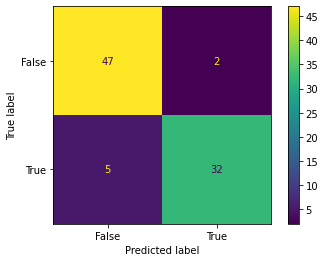

In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt
 
# make predictions
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [49]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.8648648648648649
specificity:  0.9591836734693877
PPV:  0.9411764705882353
NPV:  0.9038461538461539


In [50]:
# AUROC and AUPR value
from sklearn.metrics import auc, roc_curve, precision_recall_curve

y_predictProb = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.985107556536128
AUPR: 0.9802185803724344


<function matplotlib.pyplot.show(close=None, block=None)>

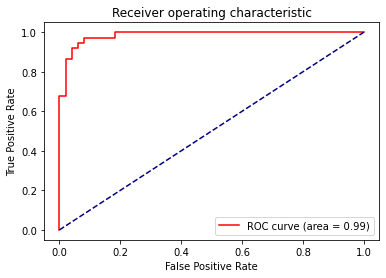

In [51]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

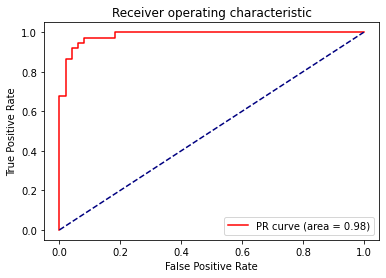

In [52]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [54]:
model_score2 = forest.score(X_test, Y_test)
model_score1 = forest.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9912790697674418
0.8604651162790697


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_train, Y_train, cv = kf)
result


array([0.82857143, 0.77142857, 0.77142857, 0.91428571, 0.85294118,
       0.94117647, 0.85294118, 0.88235294, 0.82352941, 0.73529412])

In [56]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8373949579831933


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_test, Y_test, cv = kf)
result

array([1.        , 0.77777778, 0.77777778, 0.77777778, 1.        ,
       0.66666667, 0.75      , 0.75      , 0.75      , 0.75      ])

In [58]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8


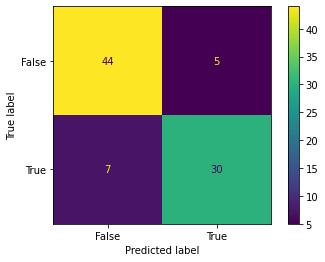

In [59]:
# make predictions
predicted = forest.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [60]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.8108108108108109
specificity:  0.8979591836734694
PPV:  0.8571428571428571
NPV:  0.8627450980392157


In [61]:
y_predictProb = forest.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9396028681742968
AUPR: 0.9228580811015226


<function matplotlib.pyplot.show(close=None, block=None)>

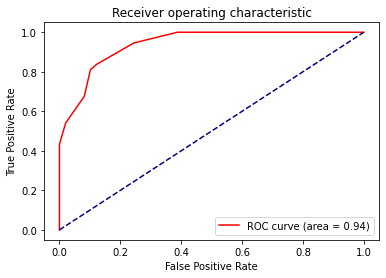

In [62]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

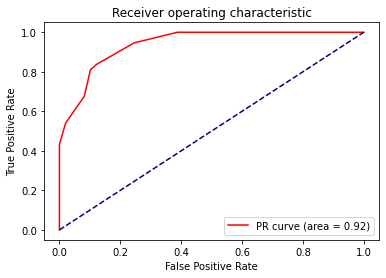

In [63]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Decision Tree

In [64]:
# using decisin tree
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [65]:
model_score2 = dclf.score(X_test, Y_test)
model_score1 = dclf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

1.0
0.872093023255814


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_train, Y_train, cv = kf)
result


array([0.82857143, 0.77142857, 0.85714286, 0.85714286, 0.82352941,
       0.85294118, 0.91176471, 0.79411765, 0.76470588, 0.85294118])

In [67]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8314285714285713


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_test, Y_test, cv = kf)
result

array([0.88888889, 1.        , 0.88888889, 0.88888889, 0.77777778,
       0.88888889, 0.875     , 1.        , 0.625     , 0.875     ])

In [69]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8708333333333332


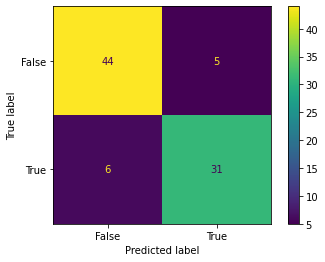

In [70]:
# make predictions
predicted = dclf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [71]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.8378378378378378
specificity:  0.8979591836734694
PPV:  0.8611111111111112
NPV:  0.88


In [72]:
# AUROC and AUPR value
y_predictProb = dclf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.8678985107556536
AUPR: 0.8843581954047071


<function matplotlib.pyplot.show(close=None, block=None)>

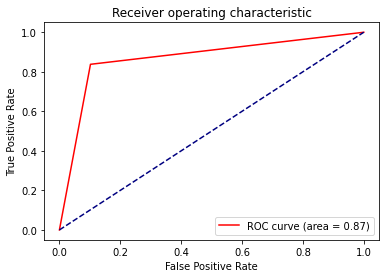

In [73]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

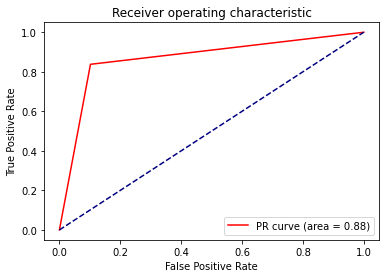

In [74]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Gradient Boost

In [75]:
#using GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
gdb.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [76]:
model_score2 = gdb.score(X_test, Y_test)
model_score1 = gdb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9302325581395349
0.8953488372093024


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_train, Y_train, cv = kf)
result

array([0.91428571, 0.77142857, 0.94285714, 0.88571429, 0.85294118,
       0.91176471, 0.97058824, 0.76470588, 0.76470588, 0.88235294])

In [78]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8661344537815125


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_test, Y_test, cv = kf)
result

array([0.88888889, 1.        , 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.875     , 0.875     , 0.75      , 0.875     ])

In [80]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8819444444444444


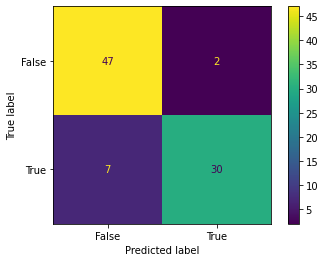

In [81]:
# make predictions
predicted = gdb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [82]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.8108108108108109
specificity:  0.9591836734693877
PPV:  0.9375
NPV:  0.8703703703703703


In [83]:
# AUROC and AUPR value
y_predictProb = gdb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9600110314396029
AUPR: 0.9549898992707502


<function matplotlib.pyplot.show(close=None, block=None)>

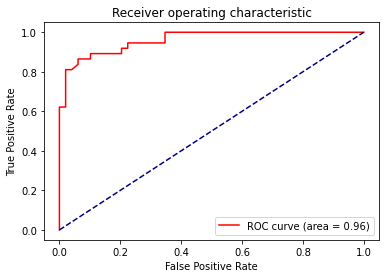

In [84]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

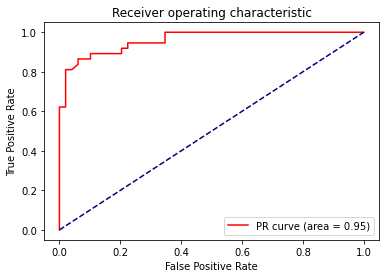

In [85]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# XGBosst

In [86]:
#using XGBClassifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state = 1, n_estimators = 10, min_samples_split = 3)
xgb_clf.fit(X_train, Y_train)

[22:37:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              min_samples_split=3, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, ...)

In [87]:
model_score2 = xgb_clf.score(X_test, Y_test)
model_score1 = xgb_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9883720930232558
0.8953488372093024


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_train, Y_train, cv = kf)
result


[22:37:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.91428571, 0.8       , 0.94285714, 0.91428571, 0.85294118,
       0.94117647, 0.94117647, 0.82352941, 0.79411765, 0.85294118])

In [89]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8777310924369747


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_test, Y_test, cv = kf)
result

[22:37:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.88888889, 1.        , 0.88888889, 0.88888889, 0.88888889,
       1.        , 0.75      , 0.875     , 0.75      , 0.875     ])

In [91]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8805555555555555


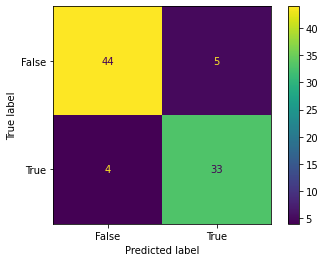

In [92]:
# make predictions
predicted = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [93]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.8918918918918919
specificity:  0.8979591836734694
PPV:  0.868421052631579
NPV:  0.9166666666666666


In [94]:
# AUROC and AUPR value
y_predictProb = xgb_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9685603971318257
AUPR: 0.961176054501424


<function matplotlib.pyplot.show(close=None, block=None)>

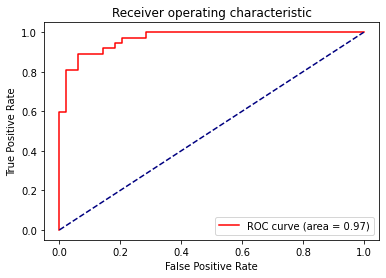

In [95]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

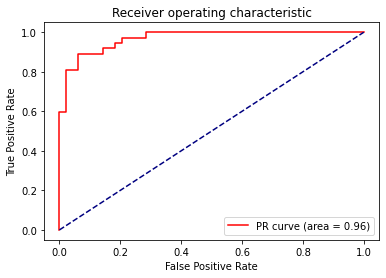

In [96]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Support Vector

In [97]:
#using support vector
from sklearn import svm
sv_clf = svm.SVC()
sv_clf.fit(X_train, Y_train)

SVC()

In [98]:
model_score2 = sv_clf.score(X_test, Y_test)
model_score1 = sv_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.7325581395348837
0.7790697674418605


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_train, Y_train, cv = kf)
result


array([0.74285714, 0.71428571, 0.68571429, 0.74285714, 0.76470588,
       0.76470588, 0.64705882, 0.82352941, 0.73529412, 0.64705882])

In [100]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7268067226890758


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_test, Y_test, cv = kf)
result

array([0.77777778, 0.88888889, 0.77777778, 0.77777778, 0.66666667,
       0.55555556, 0.875     , 0.75      , 0.625     , 0.625     ])

In [102]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7319444444444445


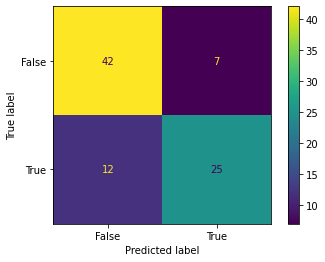

In [103]:
# make predictions
predicted = sv_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [104]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.6756756756756757
specificity:  0.8571428571428571
PPV:  0.78125
NPV:  0.7777777777777778


In [105]:
# AUROC and AUPR value
y_predictProb = sv_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

In [ ]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Naive Bayes

In [106]:
#using Naive Bayesian 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [107]:
model_score2 = gnb.score(X_test, Y_test)
model_score1 = gnb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.7848837209302325
0.8372093023255814


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_train, Y_train, cv = kf)
result


array([0.71428571, 0.74285714, 0.82857143, 0.77142857, 0.73529412,
       0.82352941, 0.73529412, 0.76470588, 0.85294118, 0.73529412])

In [109]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7704201680672268


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_test, Y_test, cv = kf)
result

array([0.77777778, 1.        , 0.88888889, 0.55555556, 1.        ,
       1.        , 0.75      , 0.5       , 0.875     , 0.875     ])

In [111]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8222222222222222


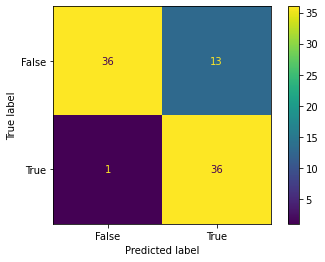

In [112]:
# make predictions
predicted = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [113]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.972972972972973
specificity:  0.7346938775510204
PPV:  0.7346938775510204
NPV:  0.972972972972973


In [114]:
# AUROC and AUPR value
y_predictProb = gnb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9241588527302813
AUPR: 0.8609742333125869


<function matplotlib.pyplot.show(close=None, block=None)>

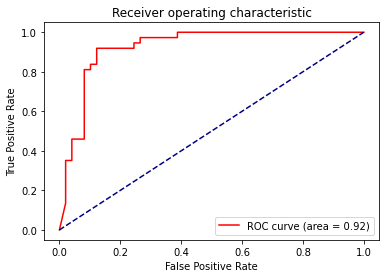

In [115]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

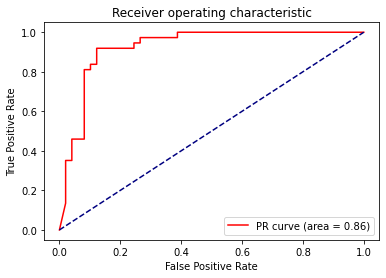

In [116]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show